In [4]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from IPython.display import Image, display
from pandas.tools.plotting import scatter_matrix 
%matplotlib inline

In [7]:
df = pd.read_csv(".\\data\\clean16.csv")

In [16]:
df.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,1,20160902,9499785259412240342,1472812272,1.0,1.472812e+09,1,1,False,1,...,1,1,0,1,1,1,1,1,1,1
1,1,20160902,3696906537737368442,1472856874,1.0,1.472857e+09,2,1,False,1,...,1,1,0,1,1,1,1,1,1,1
2,1,20160902,5688512451361930466,1472811524,1.0,1.472812e+09,2,1,False,2,...,1,1,0,1,1,1,1,1,1,1
3,1,20160902,9716453263501147451,1472823508,1.0,1.472824e+09,3,2,True,3,...,1,1,0,1,1,1,1,1,1,1
4,1,20160902,5330453591145100432,1472839619,1.0,1.472840e+09,2,1,False,1,...,1,1,0,1,1,1,1,1,1,1


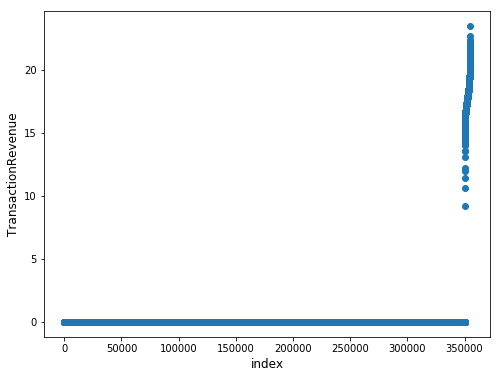

In [10]:
gdf = df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

In [15]:
nzi = pd.notnull(df["totals.transactionRevenue"]).sum()
nzr = (gdf["totals.transactionRevenue"]>0).sum()
print("Number of instances in train set with non-zero revenue : ", nzi, " and ratio is : ", nzi / df.shape[0])
print("Number of unique customers with non-zero revenue : ", nzr, "and the ratio is : ", nzr / gdf.shape[0])

Number of instances in train set with non-zero revenue :  436393  and ratio is :  1.0
Number of unique customers with non-zero revenue :  4573 and the ratio is :  0.012888588258504552
